# Import Overlay
导入Overlay

from pp4fpgas import CordicOverlay

overlay = CordicOverlay()

In [1]:
from pynq import Overlay
overlay = Overlay('cordic.bit')

# Register level driver
直接读写寄存器来使用overlay中的hls ip

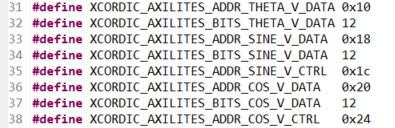

# The data type of theta is ap_fixed<12,2>

theta的数据类型为ap_fixed<12,2>

In [ ]:
theta = 0b010000000000                 
overlay.cordic_0.write(0x10, theta)
overlay.cordic_0.read(0x20)

In [2]:
#输出正弦和余弦值
cos = overlay.cordic_0.read(0x20)
sin = overlay.cordic_0.read(0x18)
print(cos)
print(sin)

1028
4091


# Learn something about this overlay
了解overlay相关的api，从中获取该overlay包含的信息

In [3]:
overlay.ip_dict

{'cordic_0': {'addr_range': 65536,
  'driver': pynq.overlay.DefaultIP,
  'fullpath': 'cordic_0',
  'gpio': {},
  'interrupts': {},
  'phys_addr': 1136656384,
  'state': None,
  'type': 'xilinx.com:hls:cordic:1.0'}}

In [4]:
overlay.gpio_dict

{}

In [5]:
overlay.clock_dict

{0: {'divisor0': 5, 'divisor1': 2, 'enable': 1},
 1: {'divisor0': 1, 'divisor1': 1, 'enable': 0},
 2: {'divisor0': 1, 'divisor1': 1, 'enable': 0},
 3: {'divisor0': 1, 'divisor1': 1, 'enable': 0}}

In [6]:
overlay.bitfile_name

'/home/xilinx/jupyter_notebooks/pp4fpgas/cordic/cordic.bit'

In [7]:
overlay.hierarchy_dict

{}

In [8]:
help(overlay)

Help on Overlay in module pynq.overlay object:

class Overlay(pynq.pl.Bitstream)
 |  This class keeps track of a single bitstream's state and contents.
 |  
 |  The overlay class holds the state of the bitstream and enables run-time
 |  protection of bindlings.
 |  
 |  Our definition of overlay is: "post-bitstream configurable design".
 |  Hence, this class must expose configurability through content discovery
 |  and runtime protection.
 |  
 |  The overlay class exposes the IP and hierarchies as attributes in the
 |  overlay. If no other drivers are available the `DefaultIP` is constructed
 |  for IP cores at top level and `DefaultHierarchy` for any hierarchies that
 |  contain addressable IP. Custom drivers can be bound to IP and hierarchies
 |  by subclassing `DefaultIP` and `DefaultHierarchy`. See the help entries
 |  for those class for more details.
 |  
 |  This class stores four dictionaries: IP, GPIO, interrupt controller
 |  and interrupt pin dictionaries.
 |  
 |  Each ent

# Write a driver for hls ip
给hls ip写一个上层驱动

In [9]:
from pynq import DefaultIP

class cordicDriver(DefaultIP):
    def __init__(self, description):
        super().__init__(description=description)

    bindto = ['xilinx.com:hls:cordic:1.0']

    def calc(self, theta):
        self.write(0x10, theta)
        return self.read(0x20)

In [2]:
from pp4fpgas import CordicOverlay

cordic = CordicOverlay('cordic.bit')

/usr/local/lib/python3.6/dist-packages/pynq_pp4fpgas-1.0-py3.6.egg/pp4fpgas/cordic/cordic.bit load ready


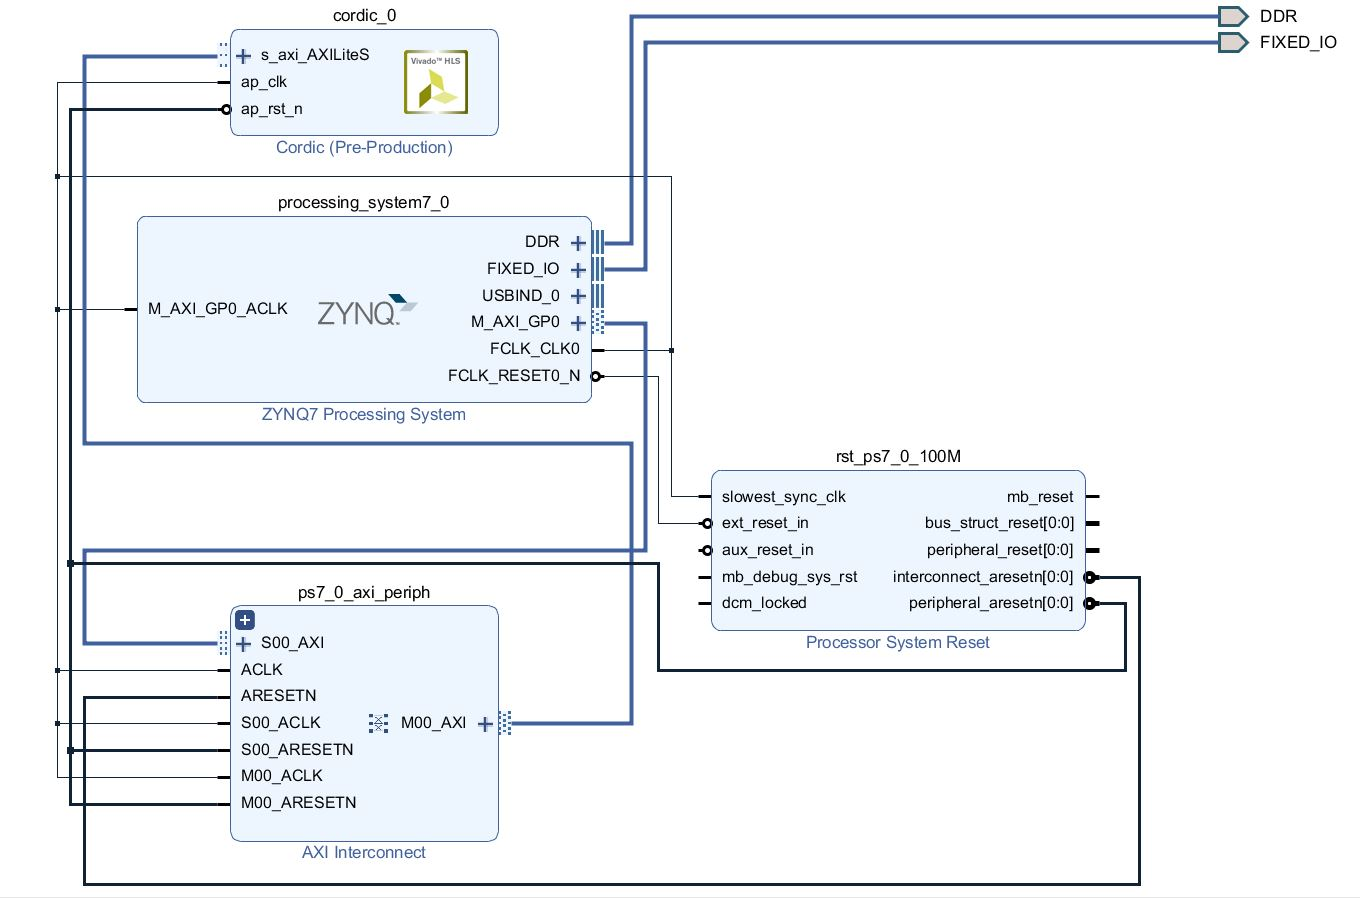

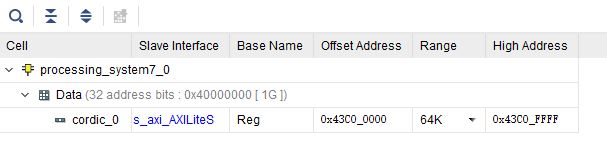

# The data type is ap_fixed<12,2>

数据类型为ap_fixed<12,2>

In [11]:
cordic.cordic_0.calc(0b010000000000)    #同theta

554